In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import cv2
import skimage
from skimage.transform import resize

import os
import natsort
import sys

print("Packages imported...")

Packages imported...


In [2]:
imageSize = 100
target_dims = (imageSize, imageSize, 3)
num_classes = 29

# train_len = 87000
train_dir = r'/Users/joaoterroa/FACULDADE/2ºSemestre/Aprendizagem-Automática-Avançada/app/asl_alphabet_train/'

def get_data(folder_dir):
    X = np.empty((87000, imageSize, imageSize, 3), dtype=np.float32) # create empty list (this is faster than appending to a list)
    y = np.empty((87000), dtype=np.int32)

    counter = 0
    for index, folder_name in enumerate(natsort.natsorted(os.listdir(folder_dir))[1:]): # iterate over each folder
        if not folder_name.startswith('.'): # check if folder is hidden
            label = index # get the current label (index number of the folder)
            sys.stdout.write('\r'+ str(f"folder name: {folder_name} - label: {index}"))
            for image_filename in natsort.natsorted(os.listdir(folder_dir + folder_name)): # iterate over each image in folder
                img_file = cv2.imread(folder_dir + folder_name + '/' + image_filename) # read image
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3)) # convert image to numpy array and reshape it
                    X[counter], y[counter] = img_arr, label # add image and label to the list
                    counter += 1 # increment counter
    
        # sys.stdout.write('\r' + str(round((index+1)/(num_classes)*100, 2)) + '%' + ' - ' + str(index) + '/' + str((num_classes)))
        sys.stdout.flush()

    return X,y

X_train, y_train = get_data(train_dir)

print("\nImages successfully imported...")

folder name: space - label: 2827
Images successfully imported...


In [2]:
# save the numoy arrays
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)

In [2]:
# load the numpy arrays
X = np.load('X_train.npy')
y = np.load('y_train.npy')

In [3]:
# make a label dictionary where the key is the label and the value is the letter
label_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}

In [4]:
print(f"Shape of X is {X.shape}")
print(f"Shape of y is {y.shape}")
print(f"Shape of a image is {X[0].shape}")

Shape of X is (87000, 100, 100, 3)
Shape of y is (87000,)
Shape of a image is (100, 100, 3)


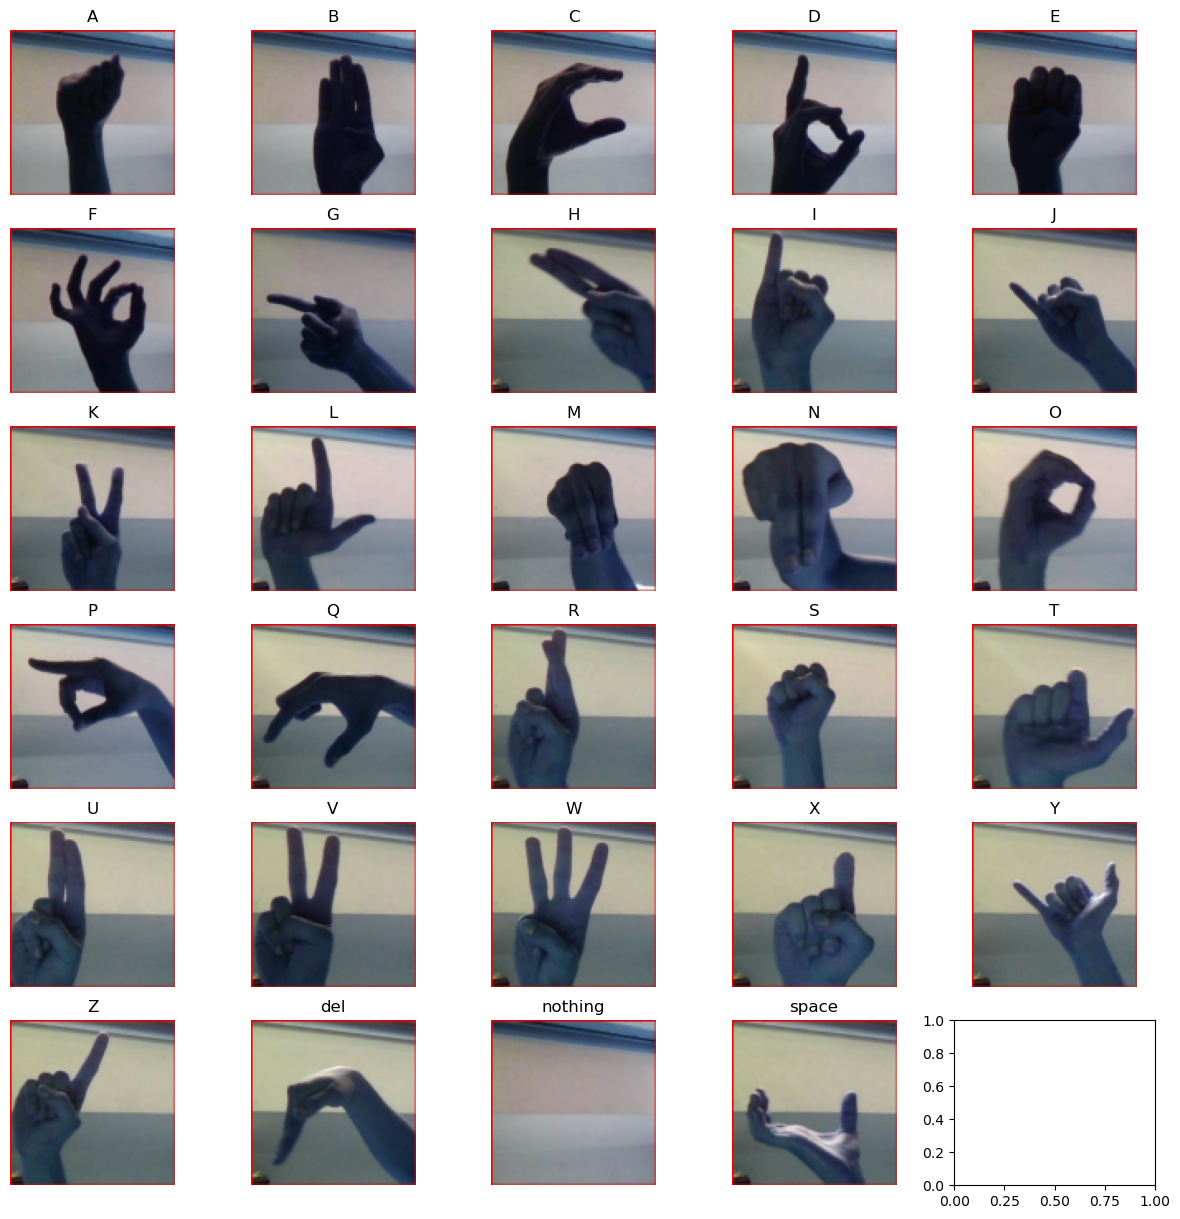

In [5]:
# plot an image from each of the 29 classes, with every class having 3000 images, in a square grid
fig, ax = plt.subplots(6, 5, figsize=(15, 15))
counter = 0
for i in range(6):
    for j in range(5):
        if counter == 29:
            break
        ax[i, j].imshow(X[counter*3000])
        ax[i, j].set_title(label_dict[y[counter*3000]])
        ax[i, j].axis('off')
        counter += 1

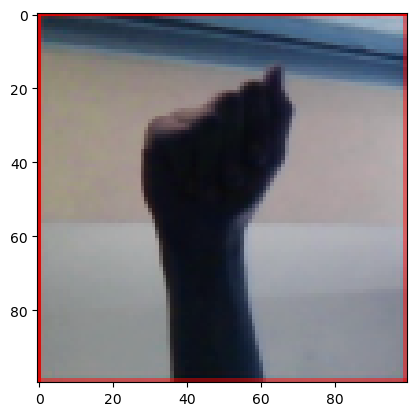

In [6]:
# show the first image
plt.imshow(X[0])


In [3]:
# Shuffle the data when splitting it into training and testing folds to ensure that the folds are representative of the entire dataset and not biased towards any specific ordering

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, # X and y
                                                    test_size=0.20, # 20% of the data is used for testing
                                                    shuffle=True, # shuffle the data before splitting because the data is ordered by class
                                                    random_state=50,
                                                    stratify=y) # stratify the data to ensure that the class proportions are the same in the train and test sets

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  train_size=0.875, # 10% of the training data is used for validation and the rest is used for training
                                                  shuffle=True, # don't shuffle because it was already shuffled 
                                                  random_state=50,
                                                  stratify=y_train) # stratify the data to ensure that the class proportions are the same in the train and validation sets

In [4]:
# garbage collection of X and y to free up memory
del X
del y

/opt/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


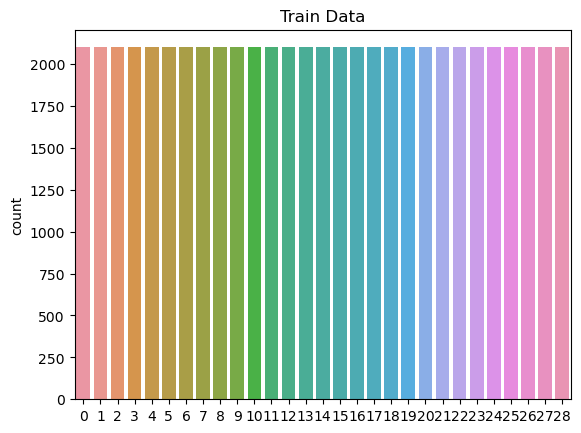

In [5]:
# see if the train data is balanced
sns.countplot(y_train)
plt.title('Train Data')
plt.show()

In [6]:
# check if train data is normalized
print("Max pixel value: ", X_train.max())
print("Min pixel value: ", X_train.min())


Max pixel value:  1.0
Min pixel value:  0.0


In [7]:
print("Training dataset size =", "{:.0f}".format(len(X_train)), 'images.')
print("Validation dataset size  =", "{:.0f}".format(len(X_val)), 'images.')
print("Testing dataset size  =", "{:.0f}".format(len(X_test)), 'images.')

Training dataset size = 60900 images.
Validation dataset size  = 8700 images.
Testing dataset size  = 17400 images.


In [8]:
# print the shape of the train, validation and test sets
print("Shape of X_train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_val is", X_val.shape)
print("Shape of y_val is", y_val.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)

Shape of X_train is (60900, 100, 100, 3)
Shape of y_train is (60900,)
Shape of X_val is (8700, 100, 100, 3)
Shape of y_val is (8700,)
Shape of X_test is (17400, 100, 100, 3)
Shape of y_test is (17400,)


In [9]:
# one hot encode the labels
num_classes = 29
from keras.utils import to_categorical
y_cat_train = to_categorical(y_train, num_classes)
y_cat_val = to_categorical(y_val, num_classes)
y_cat_test = to_categorical(y_test, num_classes)

In [10]:
# print the shape of the train, validation and test sets
print("Shape of X_train is", X_train.shape)
print("Shape of y_train is", y_cat_train.shape)
print("Shape of X_val is", X_val.shape)
print("Shape of y_val is", y_cat_val.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_cat_test.shape)

Shape of X_train is (60900, 100, 100, 3)
Shape of y_train is (60900, 29)
Shape of X_val is (8700, 100, 100, 3)
Shape of y_val is (8700, 29)
Shape of X_test is (17400, 100, 100, 3)
Shape of y_test is (17400, 29)


In [11]:
# garbage collection of non one hot encoded y to free up memory
del y_train
del y_val
del y_test

In [12]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.activations import tanh
from keras.optimizers import Adadelta
from sklearn.model_selection import KFold

In [13]:
# function for top_k_categorical_accuracy
def top_3_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

### **Model 1**

In [14]:
history = []
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X_train, y_cat_train):

    # Define the model architecture
    model = Sequential()
    model.add(Conv2D(32, (3,3), strides=(1,1), activation='tanh', input_shape =(100,100,3)))
    model.add(Conv2D(64, (3,3), strides=(1,1), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # model.add(Conv2D(64, (3,3), strides=(1,1), activation='tanh'))
    model.add(Conv2D(64, (1,1), strides=(1,1), activation='tanh'))
    # model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # model.add(Conv2D(128, (3,3), strides=(1,1), activation='tanh'))
    # model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # model.add(Dropout(0.3))

    model.add(Flatten())
    # model.add(Dense(512, activation='tanh'))
    # model.add(Dense(84, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    

    # model.add(Dropout(0.2))
    model.add(Dense(29, activation = "softmax"))

    adadelta = Adadelta(learning_rate=1.0, rho=0.95, )
    adam = keras.optimizers.Adam(learning_rate=0.001)
    early_stop = [EarlyStopping(monitor='val_loss', 
                                patience=5, 
                                restore_best_weights=True)]

    model.compile(optimizer = adam, 
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy', top_3_accuracy])
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    # Fit data to model
    history = model.fit(X_train[train], y_cat_train[train],
                        epochs = 60,
                        validation_data=(X_val, y_cat_val),
                        callbacks = [early_stop],
                        verbose = 1,
                        batch_size = 32)
    
    # Generate generalization metrics
    scores = model.evaluate(X_train[test], y_cat_train[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-21 11:15:15.682279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-21 11:15:15.682550: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/60


2023-03-21 11:15:24.251520: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-21 11:15:24.740489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1713/1713 [==============================] - ETA: 0s - loss: 3.3896 - accuracy: 0.0342 - top_3_accuracy: 0.1026

2023-03-21 11:18:13.940645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1713/1713 [==============================] - 188s 109ms/step - loss: 3.3896 - accuracy: 0.0342 - top_3_accuracy: 0.1026 - val_loss: 3.4801 - val_accuracy: 0.0345 - val_top_3_accuracy: 0.1034
Epoch 2/60
1713/1713 [==============================] - 185s 108ms/step - loss: 3.3754 - accuracy: 0.0327 - top_3_accuracy: 0.1030 - val_loss: 3.4540 - val_accuracy: 0.0345 - val_top_3_accuracy: 0.1022
Epoch 3/60
1713/1713 [==============================] - 185s 108ms/step - loss: 3.3758 - accuracy: 0.0344 - top_3_accuracy: 0.1038 - val_loss: 3.4401 - val_accuracy: 0.0328 - val_top_3_accuracy: 0.1041
Epoch 4/60
1713/1713 [==============================] - 186s 109ms/step - loss: 3.3754 - accuracy: 0.0336 - top_3_accuracy: 0.1024 - val_loss: 3.4123 - val_accuracy: 0.0354 - val_top_3_accuracy: 0.1044
Epoch 5/60
1713/1713 [==============================] - 185s 108ms/step - loss: 3.3753 - accuracy: 0.0342 - top_3_accuracy: 0.1014 - val_loss: 3.4117 - val_accuracy: 0.0302 - val_top_3_accuracy: 0.1010
E

KeyboardInterrupt: 

### **Model 2**

In [20]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=(1,1), activation='relu', input_shape =(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(64, (3,3), strides=(1,1), activation='relu'))
model.add(Conv2D(64, (1,1), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Conv2D(128, (3,3), strides=(1,1), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(29, activation = "softmax"))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 47, 47, 64)        4160      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 33856)            

In [21]:
# adam = Adam(learning_rate=1e-3)
adam = Adam(learning_rate=3e-4)
early_stop = [EarlyStopping(monitor='val_loss', 
                            patience=5, 
                            restore_best_weights=True)]

model.compile(optimizer = adam, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy', top_3_accuracy])

history = model.fit(X_train, y_train,
                    epochs = 100,
                    validation_data=(X_val, y_val),
                    callbacks = [early_stop],
                    verbose = 1,
                    batch_size = 64)

Epoch 1/100


2023-03-21 03:30:03.283456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1040/1040 [==============================] - ETA: 0s - loss: 3.3674 - accuracy: 0.0340 - top_3_accuracy: 0.1022

2023-03-21 03:31:07.022188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [18]:
loss, acc, top2acc = model.evaluate(X_test, y_test, verbose=0)

# print(f"Loss =     {loss}")
print(f"Accuracy       = {acc * 100.0:.2f} %")
print(f"Top 2 Accuracy = {top2acc * 100:.2f} %")

Accuracy       = 3.56 %
Top 2 Accuracy = 9.43 %


295/295 [==============================] - 3s 9ms/step


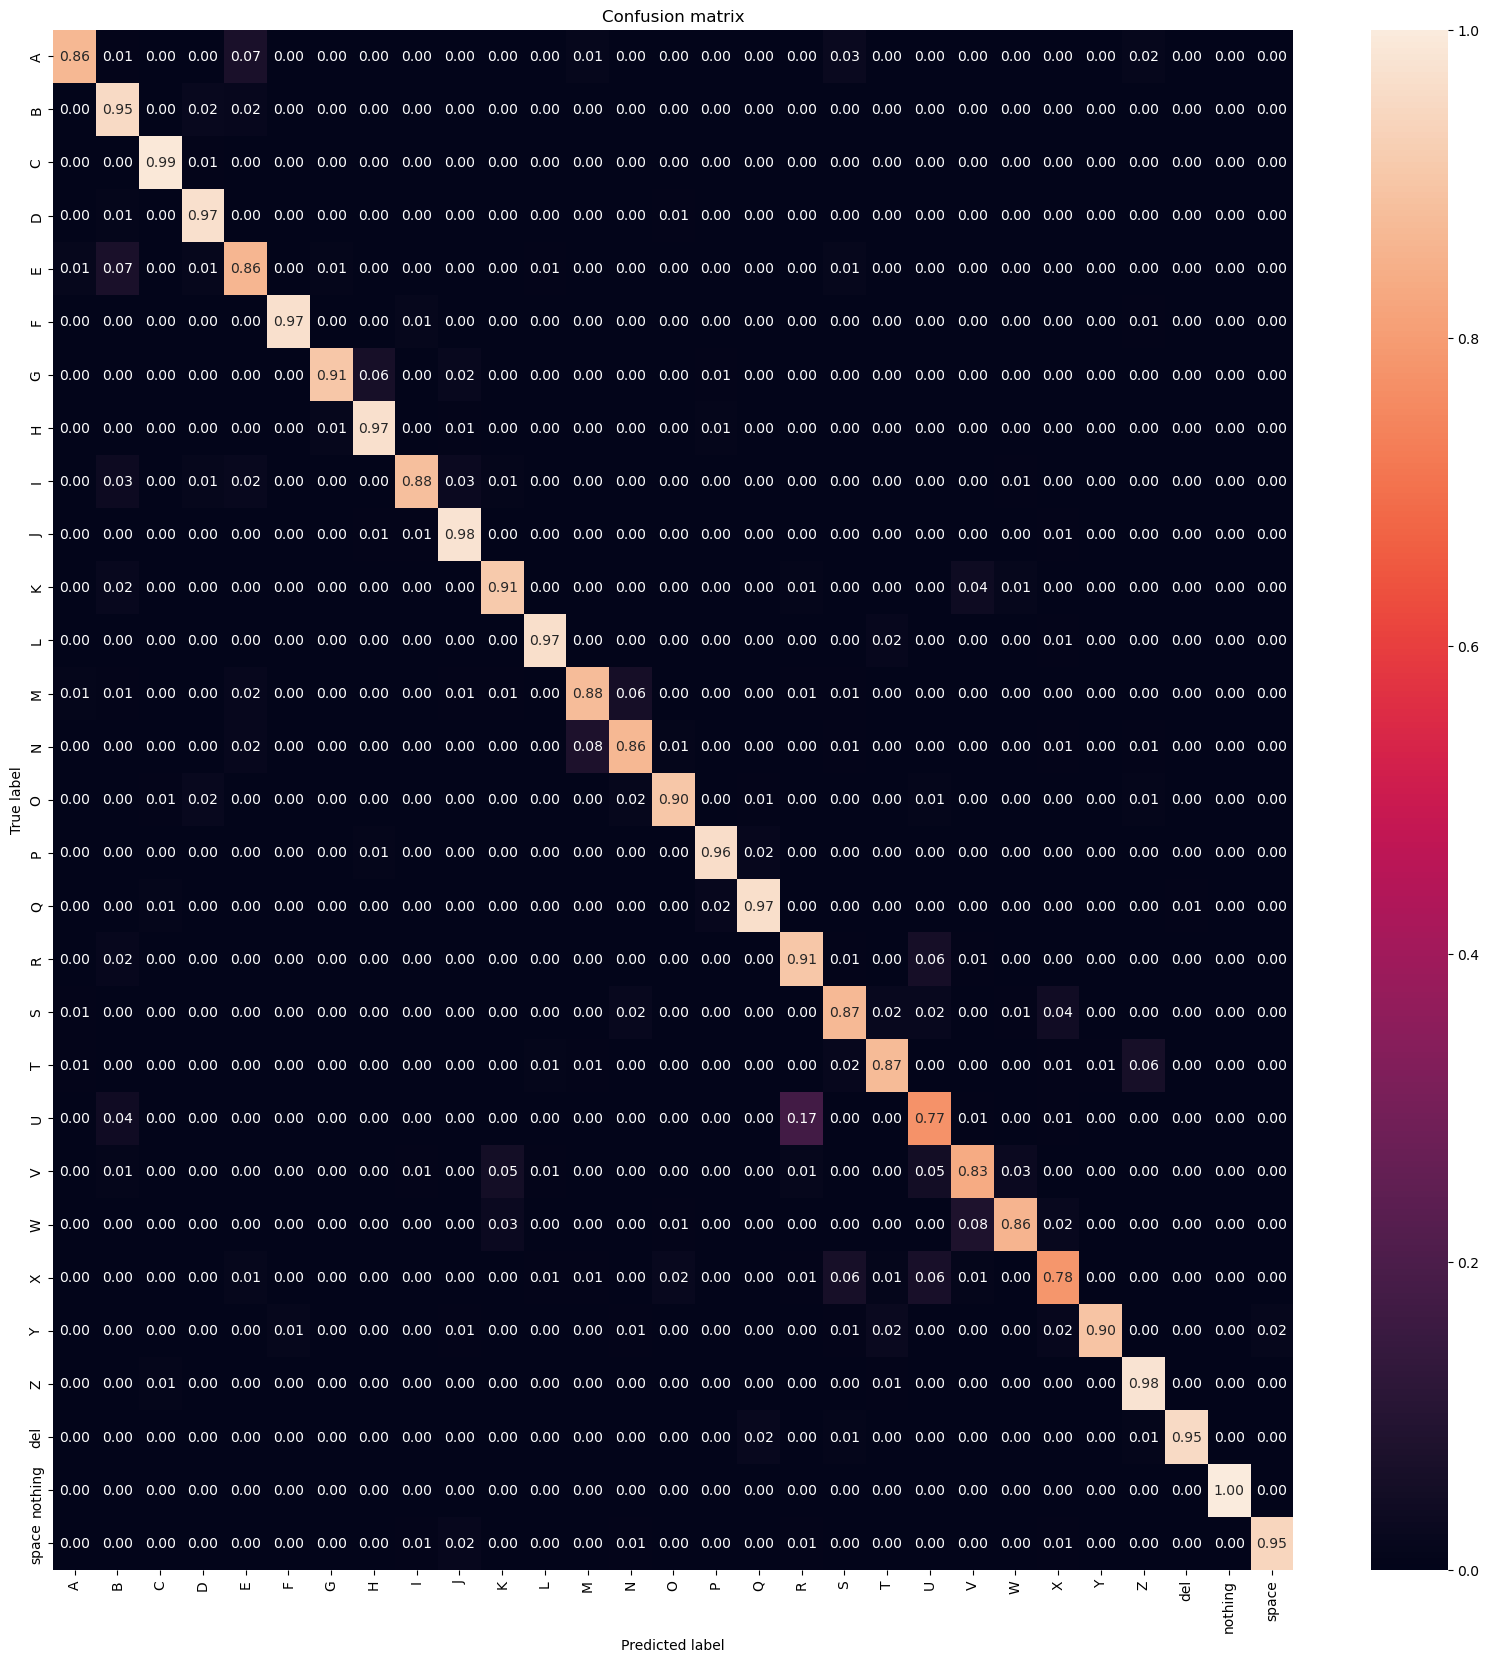

In [53]:
# plot a confusion matrix to see how the model is performing using seaborn
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20))
sns.heatmap(cm, 
            annot=True, 
            fmt='.2f', 
            xticklabels=label_dict.values(), 
            yticklabels=label_dict.values())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()



In [50]:
# save the model
# model.save('sign.h5')

In [ ]:
# load the model
from keras.models import load_model
model = load_model('sign.h5', custom_objects={'top_3_accuracy': top_3_accuracy})